# 07 Word2Vec Hyperparameter Optimization

This notebook coordinates intrinsic Word2Vec tuning using the reusable functions from src/w2v_tuning.py.

In [1]:
# Runtime Environment Info
#   - CPU: AMD Ryzen 9 (24 cores / 32 threads)
#   - RAM: 64 GB DDR5
#   - Python: 3.11
#   - gensim: auto-logged below

import os, platform, psutil, time, gensim
from datetime import datetime

print("=== Runtime & System Information ===")
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"System: {platform.system()} {platform.release()}")
print(f"Processor: {platform.processor()}")
print(f"Logical CPU cores available: {os.cpu_count()}")
print(f"Physical memory: {round(psutil.virtual_memory().total / 1e9, 1)} GB")
print(f"gensim version: {gensim.__version__}")
print("=====================================\n")

=== Runtime & System Information ===
Timestamp: 2025-10-27 22:48:36
System: Windows 10
Processor: AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD
Logical CPU cores available: 24
Physical memory: 34.3 GB
gensim version: 4.3.3



# 1 Imports

In [3]:
from src.w2v_tuning import (
    run_w2v_grid_search,
    plot_intrinsic_results,
    select_and_save_best,
    train_w2v_variant
)
from src.data_prep import load_note_corpus
from src.utils import resolve_path

import pandas as pd
import json, os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# 2 Load Tokenized Sentences

In [4]:
# Load tokenized corpora prepared in earlier data pipeline
rad_sentences = load_note_corpus("Radiology")
dis_sentences = load_note_corpus("Discharge")

print(f"Radiology notes: {len(rad_sentences)} sentences")
print(f"Discharge notes: {len(dis_sentences)} sentences")


✅ Loaded 5,206 sentences for Radiology corpus.
✅ Loaded 5,196 sentences for Discharge corpus.
Radiology notes: 5206 sentences
Discharge notes: 5196 sentences


# 3 Run Grid Search

### Radiology

In [5]:
# Detect if running in CI environment to limit grid search size
import os
if os.getenv("CI"):
    print("🔹 Detected CI environment – using lightweight demonstration grid.")
    limit = 2
else:
    limit = None  # full 64-config grid locally

# Limit combinations for efficient local runs
# - In CI environment, limit to 2 configurations for quick test
# - Locally, use full grid search

print(f"Running grid search with limit={limit or 'Full Grid (64 configs)'}")

df_rad = run_w2v_grid_search(rad_sentences, note_type="Radiology", limit=limit)

Running grid search with limit=Full Grid (64 configs)
🔧 Preparing to train 64 Word2Vec configurations for Radiology on 24 available cores...
[Radiology] Training config 1/64: {'vector_size': 100, 'window': 5, 'min_count': 2, 'sg': 0, 'negative': 5, 'epochs': 15}
[Radiology] Training config 2/64: {'vector_size': 100, 'window': 5, 'min_count': 2, 'sg': 0, 'negative': 5, 'epochs': 25}
[Radiology] Training config 3/64: {'vector_size': 100, 'window': 5, 'min_count': 2, 'sg': 0, 'negative': 10, 'epochs': 15}
[Radiology] Training config 4/64: {'vector_size': 100, 'window': 5, 'min_count': 2, 'sg': 0, 'negative': 10, 'epochs': 25}
[Radiology] Training config 5/64: {'vector_size': 100, 'window': 5, 'min_count': 2, 'sg': 1, 'negative': 5, 'epochs': 15}
[Radiology] Training config 6/64: {'vector_size': 100, 'window': 5, 'min_count': 2, 'sg': 1, 'negative': 5, 'epochs': 25}
[Radiology] Training config 7/64: {'vector_size': 100, 'window': 5, 'min_count': 2, 'sg': 1, 'negative': 10, 'epochs': 15}
[R

KeyboardInterrupt: 

In [9]:
print(df_rad.shape)

(64, 8)


### Discharge Notes

In [ ]:
'''
# Detect if running in CI environment to limit grid search size
import os
if os.getenv("CI"):
    print("🔹 Detected CI environment – using lightweight demonstration grid.")
    limit = 2
else:
    limit = None  # full 64-config grid locally

# Limit combinations for efficient local runs
# - In CI environment, limit to 2 configurations for quick test
# - Locally, use full grid search

print(f"Running grid search with limit={limit or 'Full Grid (64 configs)'}")

df_dis = run_w2v_grid_search(dis_sentences, note_type="Discharge", limit=limit)
'''

In [ ]:
# print(df_dis.shape)

# 4 View and Compare Results

In [10]:
pd.set_option("display.max_columns", None)
display(df_rad.sort_values("mean_cosine_sim", ascending=False).head(3))
# display(df_dis.sort_values("mean_cosine_sim", ascending=False).head(3))

,vector_size,window,min_count,sg,negative,epochs,runtime_s,mean_cosine_sim
22,100,10,2,1,10,15,1353.32,0.235254
23,100,10,2,1,10,25,2245.58,0.223665
20,100,10,2,1,5,15,748.86,0.220205


# 5 Visualize Intrinsic Evaluation

In [11]:
plot_intrinsic_results(df_rad, "Radiology")
# plot_intrinsic_results(df_dis, "Discharge")

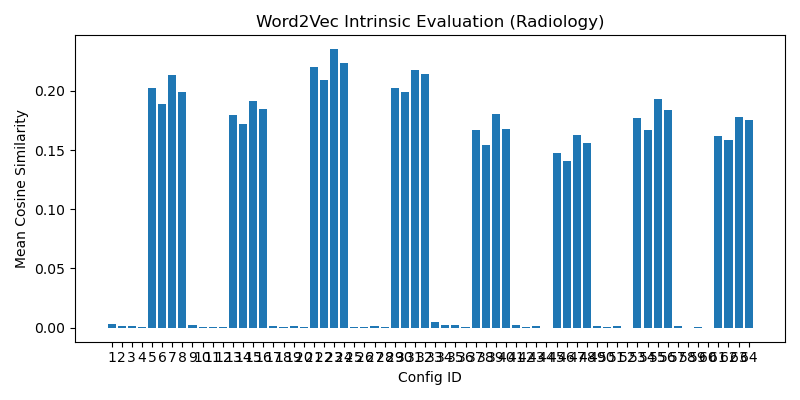

In [14]:
from IPython.display import Image, display
display(Image(filename=resolve_path("reports/figures/w2v_intrinsic_Radiology.png")))

# 6 Select and Save Best Model

In [22]:
best_rad_model, best_rad_params = select_and_save_best(rad_sentences, df_rad, "Radiology")
# best_dis_model, best_dis_params = select_and_save_best(dis_sentences, df_dis, "Discharge")

print("Best Radiology params:", best_rad_params)
# print("Best Discharge params:", best_dis_params)

🔄 Retraining Radiology Word2Vec model with best parameters...
   Parameters: {'vector_size': 100, 'window': 10, 'min_count': 2, 'sg': 1, 'negative': 10, 'epochs': 15}
✅ Finished retraining Radiology model in 22.81 minutes.
✅ [Radiology] Best model saved to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\embedding_cache\w2v\tuned\Radiology
   Parameters: {'vector_size': 100, 'window': 10, 'min_count': 2, 'sg': 1, 'negative': 10, 'epochs': 15}
Best Radiology params: {'vector_size': 100, 'window': 10, 'min_count': 2, 'sg': 1, 'negative': 10, 'epochs': 15}


# 7 Log Metadata

In [23]:
summary = pd.DataFrame([
    {"note_type": "Radiology", **best_rad_params}
    # {"note_type": "Discharge", **best_dis_params},
])
summary.to_csv(resolve_path("results/embeddings/combined_summary.csv"), index=False)
summary


,note_type,vector_size,window,min_count,sg,negative,epochs
0,Radiology,100,10,2,1,10,15


# 8 Load and Combine Intrinsic Results

In [24]:
rad_df = pd.read_csv(resolve_path("results/embeddings/Radiology/w2v_search_results.csv"))
# dis_df = pd.read_csv(resolve_path("results/embeddings/Discharge/w2v_search_results.csv"))

rad_df["note_type"] = "Radiology"
# dis_df["note_type"] = "Discharge"

# combined_df = pd.concat([rad_df, dis_df], ignore_index=True)
# combined_df.to_csv(resolve_path("results/embeddings/all_w2v_intrinsic_results.csv"), index=False)
# combined_df.head()


# 9 Compare Mean Cosine Similarity Distributions

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="note_type", y="mean_cosine_sim", data=rad_df) # change to combined_df after getting df_dis
plt.title("Distribution of Intrinsic Embedding Quality by Note Type")
plt.ylabel("Mean Cosine Similarity")
plt.xlabel("Note Type")
plt.tight_layout()
plt.savefig(resolve_path("reports/figures/w2v_intrinsic_comparison_boxplot.png"))
plt.close()


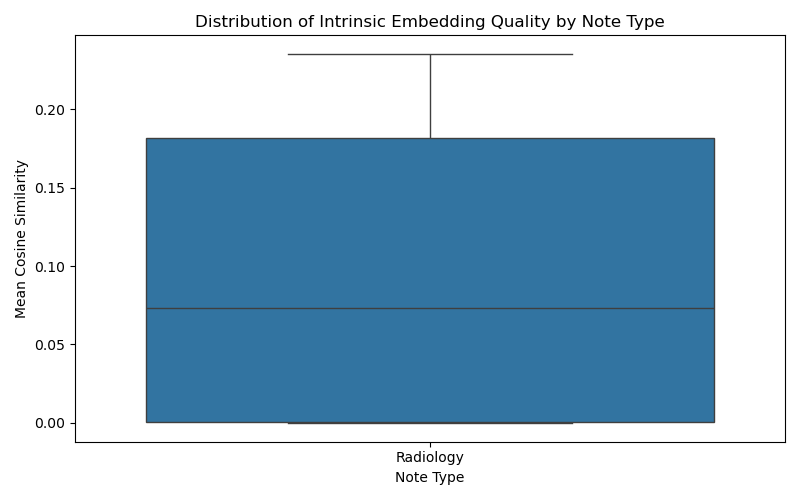

In [26]:
from IPython.display import Image, display
display(Image(filename=resolve_path("reports/figures/w2v_intrinsic_comparison_boxplot.png")))

# 10 Parameter-wise Relationship Analysis

In [27]:
corr_df = rad_df[ # change to combined_df after getting df_dis
    ["vector_size", "window", "min_count", "negative", "epochs", "mean_cosine_sim"]
].corr(method="spearman")

plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Spearman Correlation: W2V Parameters vs Mean Cosine Similarity")
plt.tight_layout()
plt.savefig(resolve_path("reports/figures/w2v_param_correlation_heatmap.png"))
plt.close()


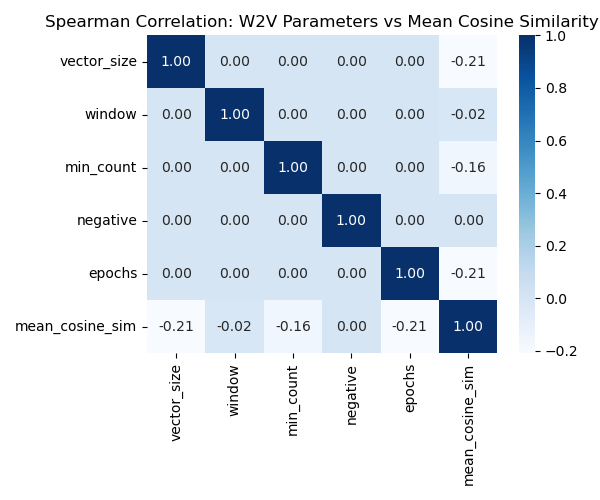

In [28]:
from IPython.display import Image, display
display(Image(filename=resolve_path("reports/figures/w2v_param_correlation_heatmap.png")))

# 11 Runtime vs Quality Trade-off

In [29]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x="runtime_s",
    y="mean_cosine_sim",
    hue="note_type",
    style="sg",
    data=rad_df, # change to combined_df
    s=80
)
plt.title("Runtime vs Embedding Coherence")
plt.xlabel("Training Time (seconds)")
plt.ylabel("Mean Cosine Similarity")
plt.tight_layout()
plt.savefig(resolve_path("reports/figures/w2v_runtime_vs_quality.png"))
plt.close()


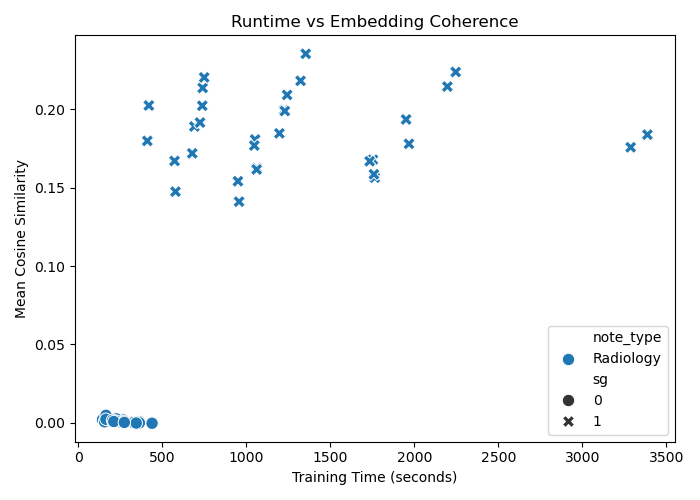

In [30]:
from IPython.display import Image, display
display(Image(filename=resolve_path("reports/figures/w2v_runtime_vs_quality.png")))

# 12 Export Aggregated Summary Table

In [31]:
summary_table = (
    rad_df.groupby("note_type") # change to combined_df after getting df_dis
    .agg(
        best_mean_sim=("mean_cosine_sim", "max"),
        avg_mean_sim=("mean_cosine_sim", "mean"),
        std_mean_sim=("mean_cosine_sim", "std"),
        avg_runtime_s=("runtime_s", "mean")
    )
    .reset_index()
)

summary_table.to_csv(resolve_path("results/embeddings/summary_intrinsic_performance.csv"), index=False)
summary_table


,note_type,best_mean_sim,avg_mean_sim,std_mean_sim,avg_runtime_s
0,Radiology,0.235254,0.093107,0.094278,783.168906


# 13 Generate Processed Feature Datasets and Save

In [53]:
# ============================================================
# From 03 Step 5 – Load Tuned Radiology Word2Vec Model, nlp_ready_df, and train/test splits
# ============================================================
from src.utils import resolve_path
from src.features import load_word2vec

rad_model_path = resolve_path("embedding_cache/w2v/tuned/Radiology/best_Radiology_w2v.model")
rad_model = load_word2vec(rad_model_path)
print(f"✅ Loaded tuned Radiology model from {rad_model_path}")

nlp_ready_df = pd.read_csv(resolve_path("data/interim/data_nlp_ready.csv"))

X_train_orig_scaled = pd.read_csv(resolve_path("data/processed/original/data_original_xtrain.csv"))
X_test_orig_scaled  = pd.read_csv(resolve_path("data/processed/original/data_original_xtest.csv"))
y_train_orig = pd.read_csv(resolve_path("data/processed/original/data_original_ytrain.csv"))
y_test_orig  = pd.read_csv(resolve_path("data/processed/original/data_original_ytest.csv"))

print(f"✅ X_train_orig_scaled: {X_train_orig.shape}")
print(f"✅ X_test_orig_scaled:  {X_test_orig.shape}")
print(f"✅ y_train_orig: {y_train_orig.shape}")
print(f"✅ y_test_orig:  {y_test_orig.shape}")


✅ Loaded Word2Vec model from C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\embedding_cache\w2v\tuned\Radiology\best_Radiology_w2v.model
✅ Loaded tuned Radiology model from C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\embedding_cache\w2v\tuned\Radiology\best_Radiology_w2v.model
✅ X_train_orig_scaled: (4166, 47)
✅ X_test_orig_scaled:  (1042, 47)
✅ y_train_orig: (4166, 1)
✅ y_test_orig:  (1042, 1)


In [54]:
# ============================================================
# From 03 Step 6 – Generate Subject-Level Embeddings (Optimized Radiology)
# ============================================================
from src.features import apply_embeddings_to_subjects

train_ids = set(X_train_orig["subject_id"])
test_ids  = set(X_test_orig["subject_id"])

train_notes = nlp_ready_df.loc[nlp_ready_df["subject_id"].isin(train_ids)].copy()
test_notes  = nlp_ready_df.loc[nlp_ready_df["subject_id"].isin(test_ids)].copy()

# Radiology embeddings using tuned model
w2v_train_rad_opt = apply_embeddings_to_subjects(
    train_notes, "Radiology_notes", rad_model, prefix="w2v_opt_rad_"
)
w2v_test_rad_opt = apply_embeddings_to_subjects(
    test_notes, "Radiology_notes", rad_model, prefix="w2v_opt_rad_"
)

print(f"✅ Tuned Radiology embeddings – Train: {w2v_train_rad_opt.shape}, Test: {w2v_test_rad_opt.shape}")

✅ Tuned Radiology embeddings – Train: (4166, 101), Test: (1042, 101)


In [55]:
# ============================================================
# From 03 Step 7 – Scale Tuned Radiology Embeddings
# ============================================================
from src.features import scale_w2v_embeddings

w2v_train_rad_opt_scaled, w2v_test_rad_opt_scaled = scale_w2v_embeddings(
    w2v_train_rad_opt, w2v_test_rad_opt, prefix="w2v_opt_rad"
)
print("✅ Tuned Radiology embeddings scaled")

✅ Scaled w2v_opt_rad embeddings saved to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\embedding_cache\w2v\baseline\w2v_opt_rad (embeddings only, not merged)
✅ Tuned Radiology embeddings scaled


In [56]:
# ============================================================
# From 03 Step 8 – Merge Structured Features + Tuned Radiology Embeddings
# ============================================================
from src.features import merge_embeddings_with_features

X_train_w2v_opt_rad, X_test_w2v_opt_rad = merge_embeddings_with_features(
    X_train_orig_scaled, X_test_orig_scaled,
    w2v_train_rad_opt_scaled, w2v_test_rad_opt_scaled,
    prefix="w2v_optimized_radiology"
)

print("✅ Structured features merged with tuned Radiology embeddings")

✅ Merged w2v_optimized_radiology train/test sets saved under C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\data\processed\w2v_optimized_radiology
✅ Structured features merged with tuned Radiology embeddings


In [ ]:
# ============================================
# From 03 Step 9 Remove subject_id column before modeling
# ============================================

variant_scaled_sets = {
    "w2v_optimized_radiology": (xtrain_rad, xtest_rad)
}

for variant, (xtrain, xtest) in variant_scaled_sets.items():
    for df_name, df in {"xtrain": xtrain, "xtest": xtest}.items():
        if "subject_id" in df.columns:
            df.drop(columns=["subject_id"], inplace=True)
            print(f"✅ Removed subject_id from {variant} {df_name}")

# ✅ Optional sanity check
for name, (Xtr, Xte) in variant_scaled_sets.items():
    assert "subject_id" not in Xtr.columns
    assert "subject_id" not in Xte.columns
print("✅ Verified: no subject_id columns remain.")

In [58]:
# ============================================================
# From 03 Step 10 – Save Optimized Radiology Datasets)
# ============================================================
import os
import pandas as pd
from src.utils import resolve_path
from src.features import save_feature_dataset

prefix   = "w2v_optimized_radiology"
base_dir = f"data/processed/{prefix}"
os.makedirs(base_dir, exist_ok=True)

# Load existing y files from the original variant
if isinstance(y_train_orig, pd.Series):
    y_train_orig = y_train_orig.to_frame()
if isinstance(y_test_orig, pd.Series):
    y_test_orig = y_test_orig.to_frame()

# Save features
save_feature_dataset(X_train_w2v_opt_rad, f"data_{prefix}_xtrain.csv", base_dir=base_dir)
save_feature_dataset(X_test_w2v_opt_rad,  f"data_{prefix}_xtest.csv",  base_dir=base_dir)

# Save labels (copied into this variant for alignment)
save_feature_dataset(y_train_orig, f"data_{prefix}_ytrain.csv", base_dir=base_dir)
save_feature_dataset(y_test_orig,  f"data_{prefix}_ytest.csv",  base_dir=base_dir)

print("✅ Tuned Radiology (optimized) datasets successfully saved to:")
print(f"   {base_dir}")


✅ Saved feature dataset → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\data\processed\w2v_optimized_radiology\data_w2v_optimized_radiology_xtrain.csv
✅ Saved feature dataset → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\data\processed\w2v_optimized_radiology\data_w2v_optimized_radiology_xtest.csv
✅ Saved feature dataset → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\data\processed\w2v_optimized_radiology\data_w2v_optimized_radiology_ytrain.csv
✅ Saved feature dataset → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\data\processed\w2v_optimized_radiology\data_w2v_optimized_radiology_ytest.csv
✅ Tuned Radiology (optimized) datasets successfully saved to:
   data/processed/w2v_optimized_radiology


# 14 Verify Outputs

In [61]:
import os
from src.utils import resolve_path

expected_files = [
    "data/processed/w2v_optimized_radiology/data_w2v_optimized_radiology_xtrain.csv",
    "data/processed/w2v_optimized_radiology/data_w2v_optimized_radiology_xtest.csv"
    #"data/processed/w2v_optimized/data_w2v_optimized_discharge_xtrain.csv",
    #"data/processed/w2v_optimized/data_w2v_optimized_discharge_xtest.csv",
]

for f in expected_files:
    print("✅ Exists:" if os.path.exists(resolve_path(f)) else "⚠️ Missing:", f)


✅ Exists: data/processed/w2v_optimized_radiology/data_w2v_optimized_radiology_xtrain.csv
✅ Exists: data/processed/w2v_optimized_radiology/data_w2v_optimized_radiology_xtest.csv


# 15 Shape and Label Balance

In [69]:
# Load features (X) and labels (y)
xtrain_rad = pd.read_csv(resolve_path("data/processed/w2v_optimized_radiology/data_w2v_optimized_radiology_xtrain.csv"))
ytrain_rad = pd.read_csv(resolve_path("data/processed/w2v_optimized_radiology/data_w2v_optimized_radiology_ytrain.csv"))

# Ensure same length
assert len(xtrain_rad) == len(ytrain_rad), "Mismatch between X_train and y_train lengths"

print(f"Radiology: {xtrain_rad.shape[0]} samples, {xtrain_rad.shape[1]} features")

# Examine class balance (assuming 'label' column exists in y)
print("Class balance:", ytrain_rad['hospital_expire_flag'].value_counts(normalize=True).round(3))


Radiology: 4166 samples, 147 features
Class balance: hospital_expire_flag
0    0.769
1    0.231
Name: proportion, dtype: float64


# 16 Verify Key Files Exist

In [64]:
'''
paths_to_check = [
    # Tuned models
    "embedding_cache/w2v/tuned/Radiology/best_Radiology_w2v.model"
    # "embedding_cache/w2v/tuned/Discharge/best_Discharge_w2v.model",

    # Results & metadata
    "results/embeddings/final_w2v_best_params.json",
    "results/embeddings/summary_intrinsic_performance.csv",

    # Processed datasets
    "data/processed/w2v_optimized/data_w2v_optimized_radiology_xtrain.csv"
    # "data/processed/w2v_optimized/data_w2v_optimized_discharge_xtrain.csv"
]

for p in paths_to_check:
    exists = os.path.exists(resolve_path(p))
    print(f"{'✅' if exists else '⚠️'} {p}")
'''

⚠️ embedding_cache/w2v/tuned/Radiology/best_Radiology_w2v.modelresults/embeddings/final_w2v_best_params.json
✅ results/embeddings/summary_intrinsic_performance.csv
⚠️ data/processed/w2v_optimized/data_w2v_optimized_radiology_xtrain.csv


# 17 Compile Final Summary Dictionary

In [ ]:
'''
best_params = json.load(open(resolve_path("results/embeddings/final_w2v_best_params.json")))
intrinsic_summary = pd.read_csv(resolve_path("results/embeddings/summary_intrinsic_performance.csv"))

final_summary = {
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "tuned_models": {
        "Radiology": "embedding_cache/w2v/tuned/Radiology/best_Radiology_w2v.model",
        "Discharge": "embedding_cache/w2v/tuned/Discharge/best_Discharge_w2v.model",
    },
    "merged_datasets": {
        "Radiology": "data/processed/w2v_optimized/data_w2v_optimized_radiology_xtrain.csv",
        "Discharge": "data/processed/w2v_optimized/data_w2v_optimized_discharge_xtrain.csv",
    },
    "best_parameters": best_params,
    "intrinsic_summary_stats": intrinsic_summary.to_dict(orient="records"),
}
'''

# 18 Save Summary JSON + CSV

In [ ]:
'''
summary_dir = resolve_path("results/embeddings/")
os.makedirs(summary_dir, exist_ok=True)

# JSON
json_path = os.path.join(summary_dir, "task8_final_summary.json")
with open(json_path, "w") as f:
    json.dump(final_summary, f, indent=2)

# Flatten to CSV (for quick inspection)
flat = intrinsic_summary.copy()
flat["source_json"] = "task8_final_summary.json"
flat.to_csv(os.path.join(summary_dir, "task8_final_summary_flat.csv"), index=False)

print("✅ Task 8 summary saved:")
print("-", json_path)
print("-", os.path.join(summary_dir, "task8_final_summary_flat.csv"))

from pprint import pprint
pprint(final_summary)
'''
